# Task 10
 Derivation of analitic formula for Levenberg–Marquardt

Let $ s(x) \in \mathbb{R}^m $ be the vector defined as ( $ s_i(x) = f_i(x) $)  
and $ J(x) \in \mathbb{R}^{m \times n} $ the Jacobian evaluated in $ x $.

At the step $ k $,  $ x_k $ is fixed and we look for the increment $ \Delta x $ that minimizes  
the Levenberg–Marquardt function, with a scalar damping parameter $ \lambda $:

$$
\min_{\Delta x \in \mathbb{R}^n} \; \Phi(\Delta x)
= \min_{\Delta x} \; \| s(x_k) + J(x_k)\,\Delta x \|^2 + \lambda\,\|\Delta x\|^2
$$

The notation is simplified taking $s_k = s(x_k)$ e $J_k = J(x_k)$. Then:

$$
\Phi(\Delta x) = (s_k + J_k \Delta x)^\top (s_k + J_k \Delta x) + \lambda \, \Delta x^\top \Delta x
$$

Developing the square:

$$
\Phi(\Delta x) = s_k^\top s_k + 2 \, s_k^\top J_k \Delta x + \Delta x^\top J_k^\top J_k \Delta x + \lambda \, \Delta x^\top \Delta x
$$

To find the minima, the gradient with respect to $ \Delta x $ is calculated and equalled to zero:

$$
\nabla_{\Delta x} \Phi(\Delta x) = 2 \, J_k^\top s_k + 2 \, (J_k^\top J_k) \Delta x + 2 \lambda \, \Delta x = 0
$$

Dividing by two and grouping $ \Delta x $:

$$
(J_k^\top J_k + \lambda I) \, \Delta x = - J_k^\top s_k
$$

Assuming  $ J_k^\top J_k + \lambda I $ invertible, the solution for the increment is found:

$$
\boxed{ \Delta x = - (J_k^\top J_k + \lambda I)^{-1} J_k^\top s_k }
$$

Finally, the parameter is updated:

$$
x_{k+1} = x_k + \Delta x
$$



Convergence reached at iteration 6
Final_values:
Center = (-1.0600, 0.9523)
Radius = 0.9443

Center LM: (-1.05997, 0.95235)
Radius LM: 0.94427


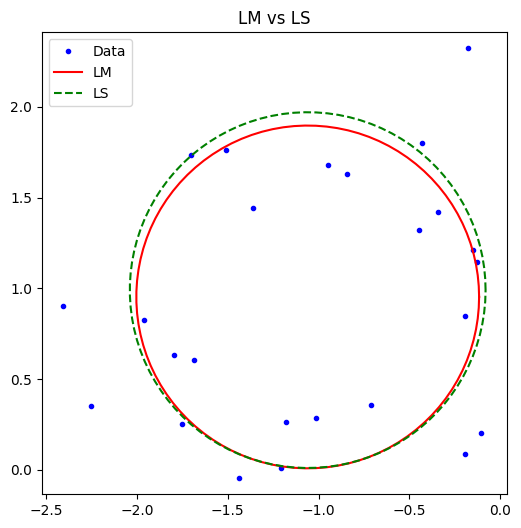

C:\Users\emanu\AppData\Local\Temp\ipykernel_25692\2869843634.py:103: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


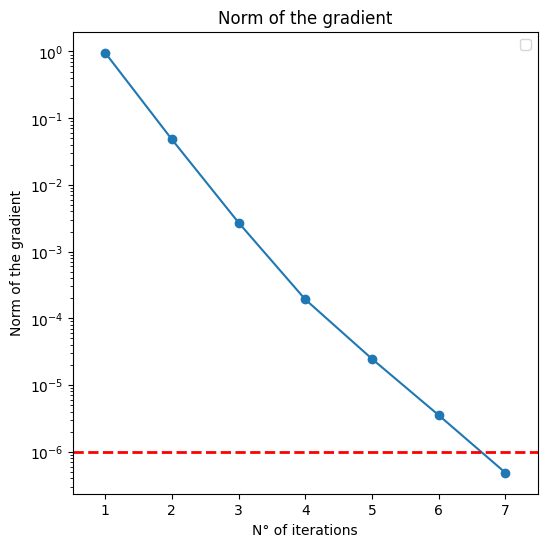

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Loading data
data = np.load('circle_data_1.npy')
if data.shape[0] == 2:
    data = data.T
x = data[:, 0]
y = data[:, 1]

# Parameters
lam = 1.0
tolerance = 1e-6
gradient_norms = []
cls = (-1.06, 0.99)
Rls = 0.98
xk = np.array([cls[0], cls[1], Rls])

# Functions
def r(p):
    a, b, R = p
    return np.sqrt((x - a)**2 + (y - b)**2) - R

def J(p):
    a, b, R = p
    d = np.sqrt((x - a)**2 + (y - b)**2)
    J = np.zeros((len(x), 3))
    J[:, 0] = (a - x) / d
    J[:, 1] = (b - y) / d
    J[:, 2] = -1
    return J

k = 0
k_list = []
gk_norm_list = []

# Iterative process
while True:
    rk = r(xk)
    Jk = J(xk)
    gk = Jk.T @ rk
    gk_norm = np.linalg.norm(gk)

    # Store for visualization
    k_list.append(k + 1)
    gk_norm_list.append(gk_norm)

    # Stop criteria
    if gk_norm < tolerance:
        print(f"Convergence reached at iteration {k}")
        break

    #formula for x
    # Δx* = - (JᵀJ + λI)⁻¹ Jᵀ r
    A = Jk.T @ Jk + lam * np.eye(3)
    delta = -np.linalg.inv(A) @ (Jk.T @ rk)

    # new x
    x_candidate = xk + delta

    
    cost_current = np.sum(rk**2)
    cost_candidate = np.sum(r(x_candidate)**2)

    if cost_candidate < cost_current:
        xk = x_candidate
        lam *= 0.7  
    else:
        lam *= 2.0  

    k += 1

# final result
print("Final_values:")
print(f"Center = ({xk[0]:.4f}, {xk[1]:.4f})")
print(f"Radius = {xk[2]:.4f}")

#final result
clm = xk[:2]
Rlm = xk[2]
print(f"\nCenter LM: ({clm[0]:.5f}, {clm[1]:.5f})")
print(f"Radius LM: {Rlm:.5f}")

#plot
theta = np.linspace(0, 2*np.pi, 100)
circle_lm_x = clm[0] + Rlm * np.cos(theta)
circle_lm_y = clm[1] + Rlm * np.sin(theta)
circle_ls_x = cls[0] + Rls * np.cos(theta)
circle_ls_y = cls[1] + Rls * np.sin(theta)

plt.figure(figsize=(6,6))
plt.plot(x, y, 'b.', label='Data')
plt.plot(circle_lm_x, circle_lm_y, 'r-', label='LM')
plt.plot(circle_ls_x, circle_ls_y, 'g--', label='LS')
plt.axis('equal')
plt.legend()
plt.title('LM vs LS')
plt.show()

plt.figure(figsize=(6,6))
plt.semilogy(k_list, gk_norm_list, '-o')
plt.axis('equal')
plt.legend()
plt.axhline(y=tolerance, color='red', linestyle='--', linewidth=2, label=f'Tolerance = {tolerance}')
plt.title('Norm of the gradient')
plt.xlabel('N° of iterations')
plt.ylabel('Norm of the gradient')
plt.show()

Although not required, it is interesting to explore how the implemented Levenberg-Marquardt (LM) method performs when no initial guesses for the center and radius are provided. Assuming the linear problem has not been solved, heuristic assumptions can still be made to estimate a reasonable starting point without relying on a separate optimization procedure. One of most straightforward one could be taking the mean point of the dataset provided as the center, and the mean between the furthest distance and the smallest distance between two points as radius.\\
To check robustness however, here worse initial values are considered:

Center: the minimum and maximum of x and y coordinates are taken, and the 4 'worst-case centers' are considered as the combination between them\\
Radius: as a starting radius, is taken the minimum and the maximum distance between two points\
 

This choices are made not to consider a real 'worst case approach' (initial center and radius could go to infinite), but more like as a 'worst case approach with reasonable values'.\
Checking all the eight combinations, the LM method converged always, at most in 12 iterations; however, in some cases the 2nd, 3rd and 4th iterations were worse than the 1st, considering 0 the starting point, but never worse than it, hinting that non-convergence could be not far from the starting points considered. This does not prove that there isn't any combinations between the values used that makes the problem diverge (or maybe it does, but the writer doesn't know if such a proof exists); however, it hints that it is not necessary to have a precise starting point in order to reach convergence. Still, this is true for this dataset, but could be wrong for another one. 